In [128]:
from spotipy.oauth2 import SpotifyClientCredentials #To access authorised Spotify data
from tqdm import tqdm_notebook
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

client_id = 'b0a721515fbe4aa689f4685942d43527'
client_secret = 'c788d362a41645fc9d30369195d66d65'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager, requests_timeout=100) #spotify object to access API


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def analyze_playlist(creator, playlist_id):
    
    # Create empty dataframe
    playlist_features_list = ["artist", "album", "track_name", "track_id", 
                             "danceability", "energy", "key", "loudness", "mode", "speechiness",
                             "instrumentalness", "liveness", "valence", "tempo", "duration_ms", "time_signature"]
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    # Create empty dict
    playlist_features = {}
    
    # Loop through every track in the playlist, extract features and append the features to the playlist df
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
        
    return playlist_df

In [3]:
spotify_playlists = sp.featured_playlists(country='US')

In [4]:
print(spotify_playlists['playlists']['items'][9]['id'])

37i9dQZF1DWZQaaqNMbbXa


In [5]:
df = pd.DataFrame(columns=["artist", "album", "track_name", "track_id", 
                             "danceability", "energy", "key", "loudness", "mode", "speechiness",
                             "instrumentalness", "liveness", "valence", "tempo", "duration_ms", "time_signature"])


In [6]:
for i in range(0,len(spotify_playlists)):
    pl = spotify_playlists['playlists']['items'][i]['id']
    playlist_id = "spotify:playlist:"+pl
    df = df.append(analyze_playlist('spotify:user:spotify', str(playlist_id)))

In [7]:
spotify_playlists = sp.user_playlists(user='spotify')
print(spotify_playlists)

{'href': 'https://api.spotify.com/v1/users/spotify/playlists?offset=0&limit=50', 'items': [{'collaborative': False, 'description': 'Ariana Grande is on top of the Hottest 50!', 'external_urls': {'spotify': 'https://open.spotify.com/playlist/37i9dQZF1DXcBWIGoYBM5M'}, 'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DXcBWIGoYBM5M', 'id': '37i9dQZF1DXcBWIGoYBM5M', 'images': [{'height': None, 'url': 'https://i.scdn.co/image/ab67706f00000003ef0b656f966320ecebec5037', 'width': None}], 'name': "Today's Top Hits", 'owner': {'display_name': 'Spotify', 'external_urls': {'spotify': 'https://open.spotify.com/user/spotify'}, 'href': 'https://api.spotify.com/v1/users/spotify', 'id': 'spotify', 'type': 'user', 'uri': 'spotify:user:spotify'}, 'primary_color': None, 'public': True, 'snapshot_id': 'MTYwMzQyNTY0MSwwMDAwMDQ0YTAwMDAwMTc1NTM5ZGEzZTMwMDAwMDE3NTUyYmZlYWY2', 'tracks': {'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DXcBWIGoYBM5M/tracks', 'total': 50}, 'type': 'playlist', 'uri': '

In [8]:
for playlists in range(0, len(spotify_playlists['items'])):
    pl_id = "spotify:playlist:"+spotify_playlists['items'][playlists]['id']
    try:
        df = df.append(analyze_playlist("spotify:user:spotify", str(pl_id)))
    except:
        pass

In [9]:
df.shape

(3401, 16)

In [10]:
unique_artists = list(set((df['artist'])))
print(unique_artists)

['Tina Charles', 'Tones And I', 'The Monotones', 'Christie Huff', 'Johnny Goth', 'Martha Reeves & The Vandellas', 'Julien Baker', 'Dame D.O.L.L.A', 'Ofenbach', 'Pacific Air', 'Doeke', '100 gecs', 'Selfish Things', 'Monica', 'Conan Gray', 'YFN Lucci', 'Eros Ramazzotti', 'Jaden', 'YNW Melly', 'The War On Drugs', 'P-Square', 'Karma Kids', 'Gwen Stefani', 'Big Sean', 'Atticus Laines', 'Arizona Zervas', 'Puddle Of Mudd', 'HARDY', 'Dirty Heads', 'Charlie Puth', 'Danna Paola', 'Reach NYC', 'Lloyd Price', 'Gypsy & The Cat', 'Monty Reiss', 'Ty Dolla $ign', 'Patrick Droney', 'Oliver Tree', 'Kenny Chesney', 'Bryson Tiller', 'Train', 'Zedd', 'Crazy Town', 'B.o.B', 'Fox Royale', 'Chicago', 'Major Lazer', 'BlocBoy JB', 'Melii', 'Peter Sandberg', 'Cardi B', 'FEVER 333', 'Stephanie Rainey', 'Night Riots', 'Kane Brown', 'Commodores', 'Rayven Justice', 'Adele', 'Bleachers', 'Gary Clark Jr.', 'JVKE', 'James DiResta', 'Blueface', 'Carlie Hanson', 'BAHA BANK$', 'Ted Nugent', 'Money Man', 'Toosii', 'Ram Jam

In [11]:

print(sp.artist_related_artists('spotify:artist:6tbjWDEIzxoDsBA1FuhfPW')['artists'][0]['id'])
print(len(sp.artist_related_artists('spotify:artist:6tbjWDEIzxoDsBA1FuhfPW')['artists']))


72OaDtakiy6yFqkt4TsiFt
20


In [12]:
related_artists = []
search = []
for artist in unique_artists:
    ar = sp.search(artist)
    ar_id = ar['tracks']['items'][0]['artists'][0]['id']
    artist_id = "spotify:artist:"+ar_id
    related_artists.append(sp.artist_related_artists(artist_id))
    

In [14]:
related_artists[1]['artists'][0]['id']

'2DORQjKJVYZMx9uu82UGtT'

In [15]:
len(related_artists)

1766

In [18]:
rl_ids = []
related_ids = []
for i in range(len(related_artists)):
    rl_dict = related_artists[i]
    try:
        for i in range(0, len(rl_dict['artists'])-1):
            rl_id = rl_dict['artists'][i]['id']
            rl_ids.append("spotify:artist:"+rl_id)
    except:
        pass
        
    

In [19]:
print(rl_ids)

['spotify:artist:6oV3BNm1Gj2GGgpYknc5TN', 'spotify:artist:5QHvbEwccF3WANUD5lEIuA', 'spotify:artist:6V6WCgi7waF55bJmylC4H5', 'spotify:artist:7GPNaPWw3STF8NYp39pd8G', 'spotify:artist:1zgNpeHQe8GulzfVkYP2VK', 'spotify:artist:6PpGPIrFf3LM7Q77eR4Bts', 'spotify:artist:1UY4oIFpjCKe5qIhKDcloe', 'spotify:artist:0dCKce6tJJdHvlWnDMwzPW', 'spotify:artist:3zFfbTj9QY7pvmtjI53DB8', 'spotify:artist:3GHovBcEWpbnwCZDPF9GpM', 'spotify:artist:0yrScqagPyABiZeoNHHe3H', 'spotify:artist:6F9RWjBvRtYDrlFVW9Ut7M', 'spotify:artist:4dn4KQgTE4P3jrwa3iIVzQ', 'spotify:artist:3Dd6jD1AApgtNoU6SJWR7P', 'spotify:artist:3R6f1aBWwde7ZqGv7hf4dY', 'spotify:artist:1HvcqyRLS9nF8hAbTWOqpr', 'spotify:artist:2zpFG5cvw00QmrYTUsjApa', 'spotify:artist:0bShb58TO0fM5jOjXhB1WT', 'spotify:artist:0iGmfKLgK5eSMgHp8YgLnS', 'spotify:artist:2DORQjKJVYZMx9uu82UGtT', 'spotify:artist:4SdIXLzfabqU61iK7SnKAU', 'spotify:artist:5PjekOABtfU2Kwo0AHVmci', 'spotify:artist:6NFyaN9PMCDZ3LKxGwHAXt', 'spotify:artist:6S0IvKlvPMX1RtAYtVpUV8', 'spotify:artist

In [20]:
len(rl_ids)

32746

In [21]:
unique_ids = list(set(rl_ids))
len(unique_ids)

11027

In [23]:
song_ids = []
for ids in unique_ids:
    albums = sp.artist_albums(ids)
    try:
        for i in range(0,len(albums)-1):
            album_id = albums['items'][i]['id']
            album_tracks = sp.album_tracks(album_id)
            for i in album_tracks.items():
                s = album_tracks['items']
                for i in range(len(s)-1):
                    song_ids.append(s[i]['uri'])
    except:
        pass


In [24]:
album_tracks['items'][0]['uri']

'spotify:track:1sLTfDuZM7vHTOgpvxEgwT'

In [25]:
type(s)

list

In [26]:
song_ids

['spotify:track:0N9uZRrJQ3lO5TmInEjLxc',
 'spotify:track:6BZod0TkigBzcmTS0yub9d',
 'spotify:track:3CblveTaUy2cw1PjVRrUzu',
 'spotify:track:3yOs8FffuG6hPbzQG9lIqV',
 'spotify:track:6JlQE8m1L6Ys4Q8F8m3CHN',
 'spotify:track:0uQAsKJyxFTbNn4KEEWixr',
 'spotify:track:4H2uxqVGn7mneqyvbzLN4D',
 'spotify:track:7HRM4n1XUrMz5b42I7NLsb',
 'spotify:track:1hSfY8206QlrfEW1NiYeRf',
 'spotify:track:62gIIYPpk8UfTNAYCmmBPW',
 'spotify:track:7HMuRwyVcNPrD3nR91QjR9',
 'spotify:track:4sEgE6BfzSdnNzd2offEbt',
 'spotify:track:2rHsFNqmmKE6beVdI4cmqd',
 'spotify:track:0N9uZRrJQ3lO5TmInEjLxc',
 'spotify:track:6BZod0TkigBzcmTS0yub9d',
 'spotify:track:3CblveTaUy2cw1PjVRrUzu',
 'spotify:track:3yOs8FffuG6hPbzQG9lIqV',
 'spotify:track:6JlQE8m1L6Ys4Q8F8m3CHN',
 'spotify:track:0uQAsKJyxFTbNn4KEEWixr',
 'spotify:track:4H2uxqVGn7mneqyvbzLN4D',
 'spotify:track:7HRM4n1XUrMz5b42I7NLsb',
 'spotify:track:1hSfY8206QlrfEW1NiYeRf',
 'spotify:track:62gIIYPpk8UfTNAYCmmBPW',
 'spotify:track:7HMuRwyVcNPrD3nR91QjR9',
 'spotify:track:

In [27]:
len(song_ids)

3750068

In [28]:
song_ids = list(set(song_ids))

In [29]:
len(song_ids)

528242

In [30]:
af = sp.audio_features("spotify:track:5RpwxaJrGywY3YsMF27WuE")
print(af)

[{'danceability': 0.639, 'energy': 0.718, 'key': 2, 'loudness': -5.687, 'mode': 1, 'speechiness': 0.0348, 'acousticness': 0.626, 'instrumentalness': 0, 'liveness': 0.15, 'valence': 0.495, 'tempo': 131.934, 'type': 'audio_features', 'id': '5RpwxaJrGywY3YsMF27WuE', 'uri': 'spotify:track:5RpwxaJrGywY3YsMF27WuE', 'track_href': 'https://api.spotify.com/v1/tracks/5RpwxaJrGywY3YsMF27WuE', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5RpwxaJrGywY3YsMF27WuE', 'duration_ms': 225907, 'time_signature': 4}]


In [31]:
song_feature_list = ["danceability", "energy",
                         "key", "loudness", "mode", "speechiness",
                         "instrumentalness", "liveness", "valence",
                         "tempo", "duration_ms", "time_signature"]
songs_df = pd.DataFrame(columns=song_feature_list)
for song in song_ids:
    try:
        audio_features = sp.audio_features(song)
        af = audio_features[0]
        song_features = {}
        if af != None:
            try:
                song_features['id'] = af['uri']
                song_features['danceability'] = af['danceability']
                song_features['energy'] = af['energy']
                song_features['key'] = af['key']
                song_features['loudness'] = af['loudness']
                song_features['mode'] = af['mode']
                song_features['speechiness'] = af['speechiness']
                song_features['acousticness'] = af['acousticness']
                song_features['intrumentalness'] = af['instrumentalness']
                song_features['liveness'] = af['liveness']
                song_features['valence'] = af['valence']
                song_features['tempo'] = af['tempo']
                song_features['duration_ms'] = af['duration_ms']
                song_features['time_signature'] = af['time_signature']

                song_df = pd.DataFrame(song_features, index=[0])
                songs_df = pd.concat([songs_df, song_df], ignore_index=True)
            except:
                pass
        else:
            pass
    except:
        pass
    

In [32]:
songs_df.shape

(516909, 15)

In [33]:
songs_df.head()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,acousticness,intrumentalness
0,0.864,0.533,7,-7.295,1,0.2830,NaN,0.031,0.324,85.015,126373,4,spotify:track:5raMooP5KTN1ekg9zXpbkh,0.019200,0.010900
1,0.300,0.156,11,-23.834,0,0.0488,NaN,0.393,0.397,139.295,272693,4,spotify:track:0hj79alcSdUIuF9Dieu6Wx,0.346000,0.000735
2,0.524,0.892,9,-2.992,0,0.0549,NaN,0.085,0.690,136.059,180293,4,spotify:track:37VeXMHlxA4xyFx9aTtpxQ,0.000014,0.004390
3,0.388,0.811,5,-9.833,0,0.0384,NaN,0.129,0.664,98.537,278053,4,spotify:track:5UJ3CuFvSXJ0RmCtvoyb3d,0.023700,0.002450
4,0.567,0.146,6,-16.453,1,0.0617,NaN,0.121,0.128,128.744,58667,4,spotify:track:54iALMyuZQBpi1q5woxoLO,0.926000,0.000000


In [35]:
df2 = songs_df.drop(columns='instrumentalness', axis=1)
df2.head()

,danceability,energy,key,loudness,mode,speechiness,liveness,valence,tempo,duration_ms,time_signature,id,acousticness,intrumentalness
0,0.864,0.533,7,-7.295,1,0.2830,0.031,0.324,85.015,126373,4,spotify:track:5raMooP5KTN1ekg9zXpbkh,0.019200,0.010900
1,0.300,0.156,11,-23.834,0,0.0488,0.393,0.397,139.295,272693,4,spotify:track:0hj79alcSdUIuF9Dieu6Wx,0.346000,0.000735
2,0.524,0.892,9,-2.992,0,0.0549,0.085,0.690,136.059,180293,4,spotify:track:37VeXMHlxA4xyFx9aTtpxQ,0.000014,0.004390
3,0.388,0.811,5,-9.833,0,0.0384,0.129,0.664,98.537,278053,4,spotify:track:5UJ3CuFvSXJ0RmCtvoyb3d,0.023700,0.002450
4,0.567,0.146,6,-16.453,1,0.0617,0.121,0.128,128.744,58667,4,spotify:track:54iALMyuZQBpi1q5woxoLO,0.926000,0.000000


In [36]:
df2 = df2.rename(columns={'intrumentalness':'instrumentalness'})

In [37]:
df2.head()

,danceability,energy,key,loudness,mode,speechiness,liveness,valence,tempo,duration_ms,time_signature,id,acousticness,instrumentalness
0,0.864,0.533,7,-7.295,1,0.2830,0.031,0.324,85.015,126373,4,spotify:track:5raMooP5KTN1ekg9zXpbkh,0.019200,0.010900
1,0.300,0.156,11,-23.834,0,0.0488,0.393,0.397,139.295,272693,4,spotify:track:0hj79alcSdUIuF9Dieu6Wx,0.346000,0.000735
2,0.524,0.892,9,-2.992,0,0.0549,0.085,0.690,136.059,180293,4,spotify:track:37VeXMHlxA4xyFx9aTtpxQ,0.000014,0.004390
3,0.388,0.811,5,-9.833,0,0.0384,0.129,0.664,98.537,278053,4,spotify:track:5UJ3CuFvSXJ0RmCtvoyb3d,0.023700,0.002450
4,0.567,0.146,6,-16.453,1,0.0617,0.121,0.128,128.744,58667,4,spotify:track:54iALMyuZQBpi1q5woxoLO,0.926000,0.000000


In [109]:
df = df2.dropna()

In [110]:
df.shape

(516909, 14)

In [41]:
years = list(range(1955,2016))
filepaths = []
for year in years:
    filepaths.append('billboard' + str(year) + '.csv')  
print(filepaths)

['billboard1955.csv', 'billboard1956.csv', 'billboard1957.csv', 'billboard1958.csv', 'billboard1959.csv', 'billboard1960.csv', 'billboard1961.csv', 'billboard1962.csv', 'billboard1963.csv', 'billboard1964.csv', 'billboard1965.csv', 'billboard1966.csv', 'billboard1967.csv', 'billboard1968.csv', 'billboard1969.csv', 'billboard1970.csv', 'billboard1971.csv', 'billboard1972.csv', 'billboard1973.csv', 'billboard1974.csv', 'billboard1975.csv', 'billboard1976.csv', 'billboard1977.csv', 'billboard1978.csv', 'billboard1979.csv', 'billboard1980.csv', 'billboard1981.csv', 'billboard1982.csv', 'billboard1983.csv', 'billboard1984.csv', 'billboard1985.csv', 'billboard1986.csv', 'billboard1987.csv', 'billboard1988.csv', 'billboard1989.csv', 'billboard1990.csv', 'billboard1991.csv', 'billboard1992.csv', 'billboard1993.csv', 'billboard1994.csv', 'billboard1995.csv', 'billboard1996.csv', 'billboard1997.csv', 'billboard1998.csv', 'billboard1999.csv', 'billboard2000.csv', 'billboard2001.csv', 'billboard20

In [79]:
billboard = pd.DataFrame()
for file in filepaths:
    df = pd.read_csv(file)
    billboard = billboard.append(df, ignore_index=True)

In [80]:
billboard.head()

,Position,Artist,Song Title,PositionÊ
0,1.0,Perez Prado,Cherry Pink And Apple Blossom White,NaN
1,2.0,Bill Haley and His Comets,Rock Around The Clock,NaN
2,3.0,Mitch Miller,The Yellow Rose Of Texas,NaN
3,4.0,Roger Williams,Autumn Leaves,NaN
4,5.0,Les Baxter,Unchained Melody,NaN


In [81]:
billboard.shape

(6030, 4)

In [82]:
billboard = billboard.drop('PositionÊ', axis=1)
print(billboard.shape)
print(billboard.head())

(6030, 3)
   Position                     Artist                           Song Title
0       1.0                Perez Prado  Cherry Pink And Apple Blossom White
1       2.0  Bill Haley and His Comets                Rock Around The Clock
2       3.0               Mitch Miller             The Yellow Rose Of Texas
3       4.0             Roger Williams                        Autumn Leaves
4       5.0                 Les Baxter                     Unchained Melody


In [104]:
spotify_id = []
for i, row in billboard.iterrows():
    try:
        artist = row['Artist']
        song = row['Song Title']
        q="artist:"+artist+" track:"+song
        s = sp.search(q=q, limit=1)
        uri =  s['tracks']['items'][0]['uri']
        spotify_id.append(uri)
    except:
        uri='Not Found'
        spotify_id.append(uri)



In [105]:
spotify_id

['spotify:track:5HisVcYPaIB4uHdrnW6HCt',
 'spotify:track:1uRKT2LRANv4baowBWHfDS',
 'spotify:track:7985fUI9WlsIIrQuO9TBDh',
 'spotify:track:3hg2zWOJ0MCgvBCD8fzMgt',
 'spotify:track:4dnbvB2Y3cZncApCwowEQx',
 'Not Found',
 'spotify:track:5koEBSDfDV8MQVN0tg67z5',
 'spotify:track:4bsND9IuJz18UtFx2MwwO8',
 'Not Found',
 'spotify:track:1VbPvNOeKkkQGoMgeWeMzL',
 'Not Found',
 'spotify:track:0LUiao3Q2SQOXNQjq6xXva',
 'spotify:track:4KM77RUl2IKdXGhtOBbKIS',
 'spotify:track:6rNOKdqa2lThuBIJOZXSVa',
 'Not Found',
 'spotify:track:2TRt55mhsEEC7tuwE5dQdd',
 'spotify:track:3M6vVP9wlbGC10xZ654SDb',
 'spotify:track:1T3tP6HvCgDF8ewpRqwM1e',
 'spotify:track:4y77BxjMGSmFZ441aZDuCZ',
 'spotify:track:35eRfaVytfTFAr8QKX5urU',
 'spotify:track:2W11sWsAZU9n4TyOvqybfl',
 'spotify:track:5hDKXaqNk8QuwZoEIDAJU9',
 'spotify:track:6X5rokZwjXRO2wNx2IahSb',
 'spotify:track:15mGhkWTMqYVle8OCLCmrh',
 'spotify:track:3SjRiz3g7gIEdn8wf7KMcA',
 'Not Found',
 'spotify:track:6Oeb87Fsn0CMDY0AP25T3R',
 'Not Found',
 'spotify:trac

In [106]:
billboard['spotify_id'] = spotify_id

In [107]:
billboard.shape

(6030, 4)

In [108]:
billboard.head()

,Position,Artist,Song Title,spotify_id
0,1.0,Perez Prado,Cherry Pink And Apple Blossom White,spotify:track:5HisVcYPaIB4uHdrnW6HCt
1,2.0,Bill Haley and His Comets,Rock Around The Clock,spotify:track:1uRKT2LRANv4baowBWHfDS
2,3.0,Mitch Miller,The Yellow Rose Of Texas,spotify:track:7985fUI9WlsIIrQuO9TBDh
3,4.0,Roger Williams,Autumn Leaves,spotify:track:3hg2zWOJ0MCgvBCD8fzMgt
4,5.0,Les Baxter,Unchained Melody,spotify:track:4dnbvB2Y3cZncApCwowEQx


In [113]:
df['hits'] = np.where(df['id'].isin(spotify_id), 1, 0)
df['hits'].value_counts()

0    516388
1       521
Name: hits, dtype: int64

In [114]:
df.shape

(516909, 15)

In [119]:
df_hits = df[df['hits'] == 1]
df_hits.head()

,danceability,energy,key,loudness,mode,speechiness,liveness,valence,tempo,duration_ms,time_signature,id,acousticness,instrumentalness,hits
1779,0.469,0.722,6,-4.806,1,0.0326,0.1230,0.529,85.984,283000,4,spotify:track:5eQtR62IZ8P8qZM2pSD9Ip,0.2320,0.0,1
2011,0.888,0.577,1,-7.702,0,0.0612,0.1310,0.609,84.003,241840,4,spotify:track:05Sgj1Hx03ZXc57gsV1kfX,0.0986,0.0,1
3219,0.679,0.657,5,-9.897,1,0.0255,0.0497,0.546,97.800,266867,4,spotify:track:4VZDv8sASBS8UruUBGTFdk,0.4000,0.0,1
3242,0.495,0.446,5,-11.684,1,0.0344,0.0795,0.786,132.903,138553,4,spotify:track:4IEYMhevAlayVbTNkOFQqW,0.4440,0.0,1
3758,0.488,0.464,1,-9.496,1,0.0284,0.5700,0.709,109.853,208293,4,spotify:track:3EFb1qDgIqf9MegIryKtDj,0.7420,0.0,1


In [120]:
df_hits.shape

(521, 15)

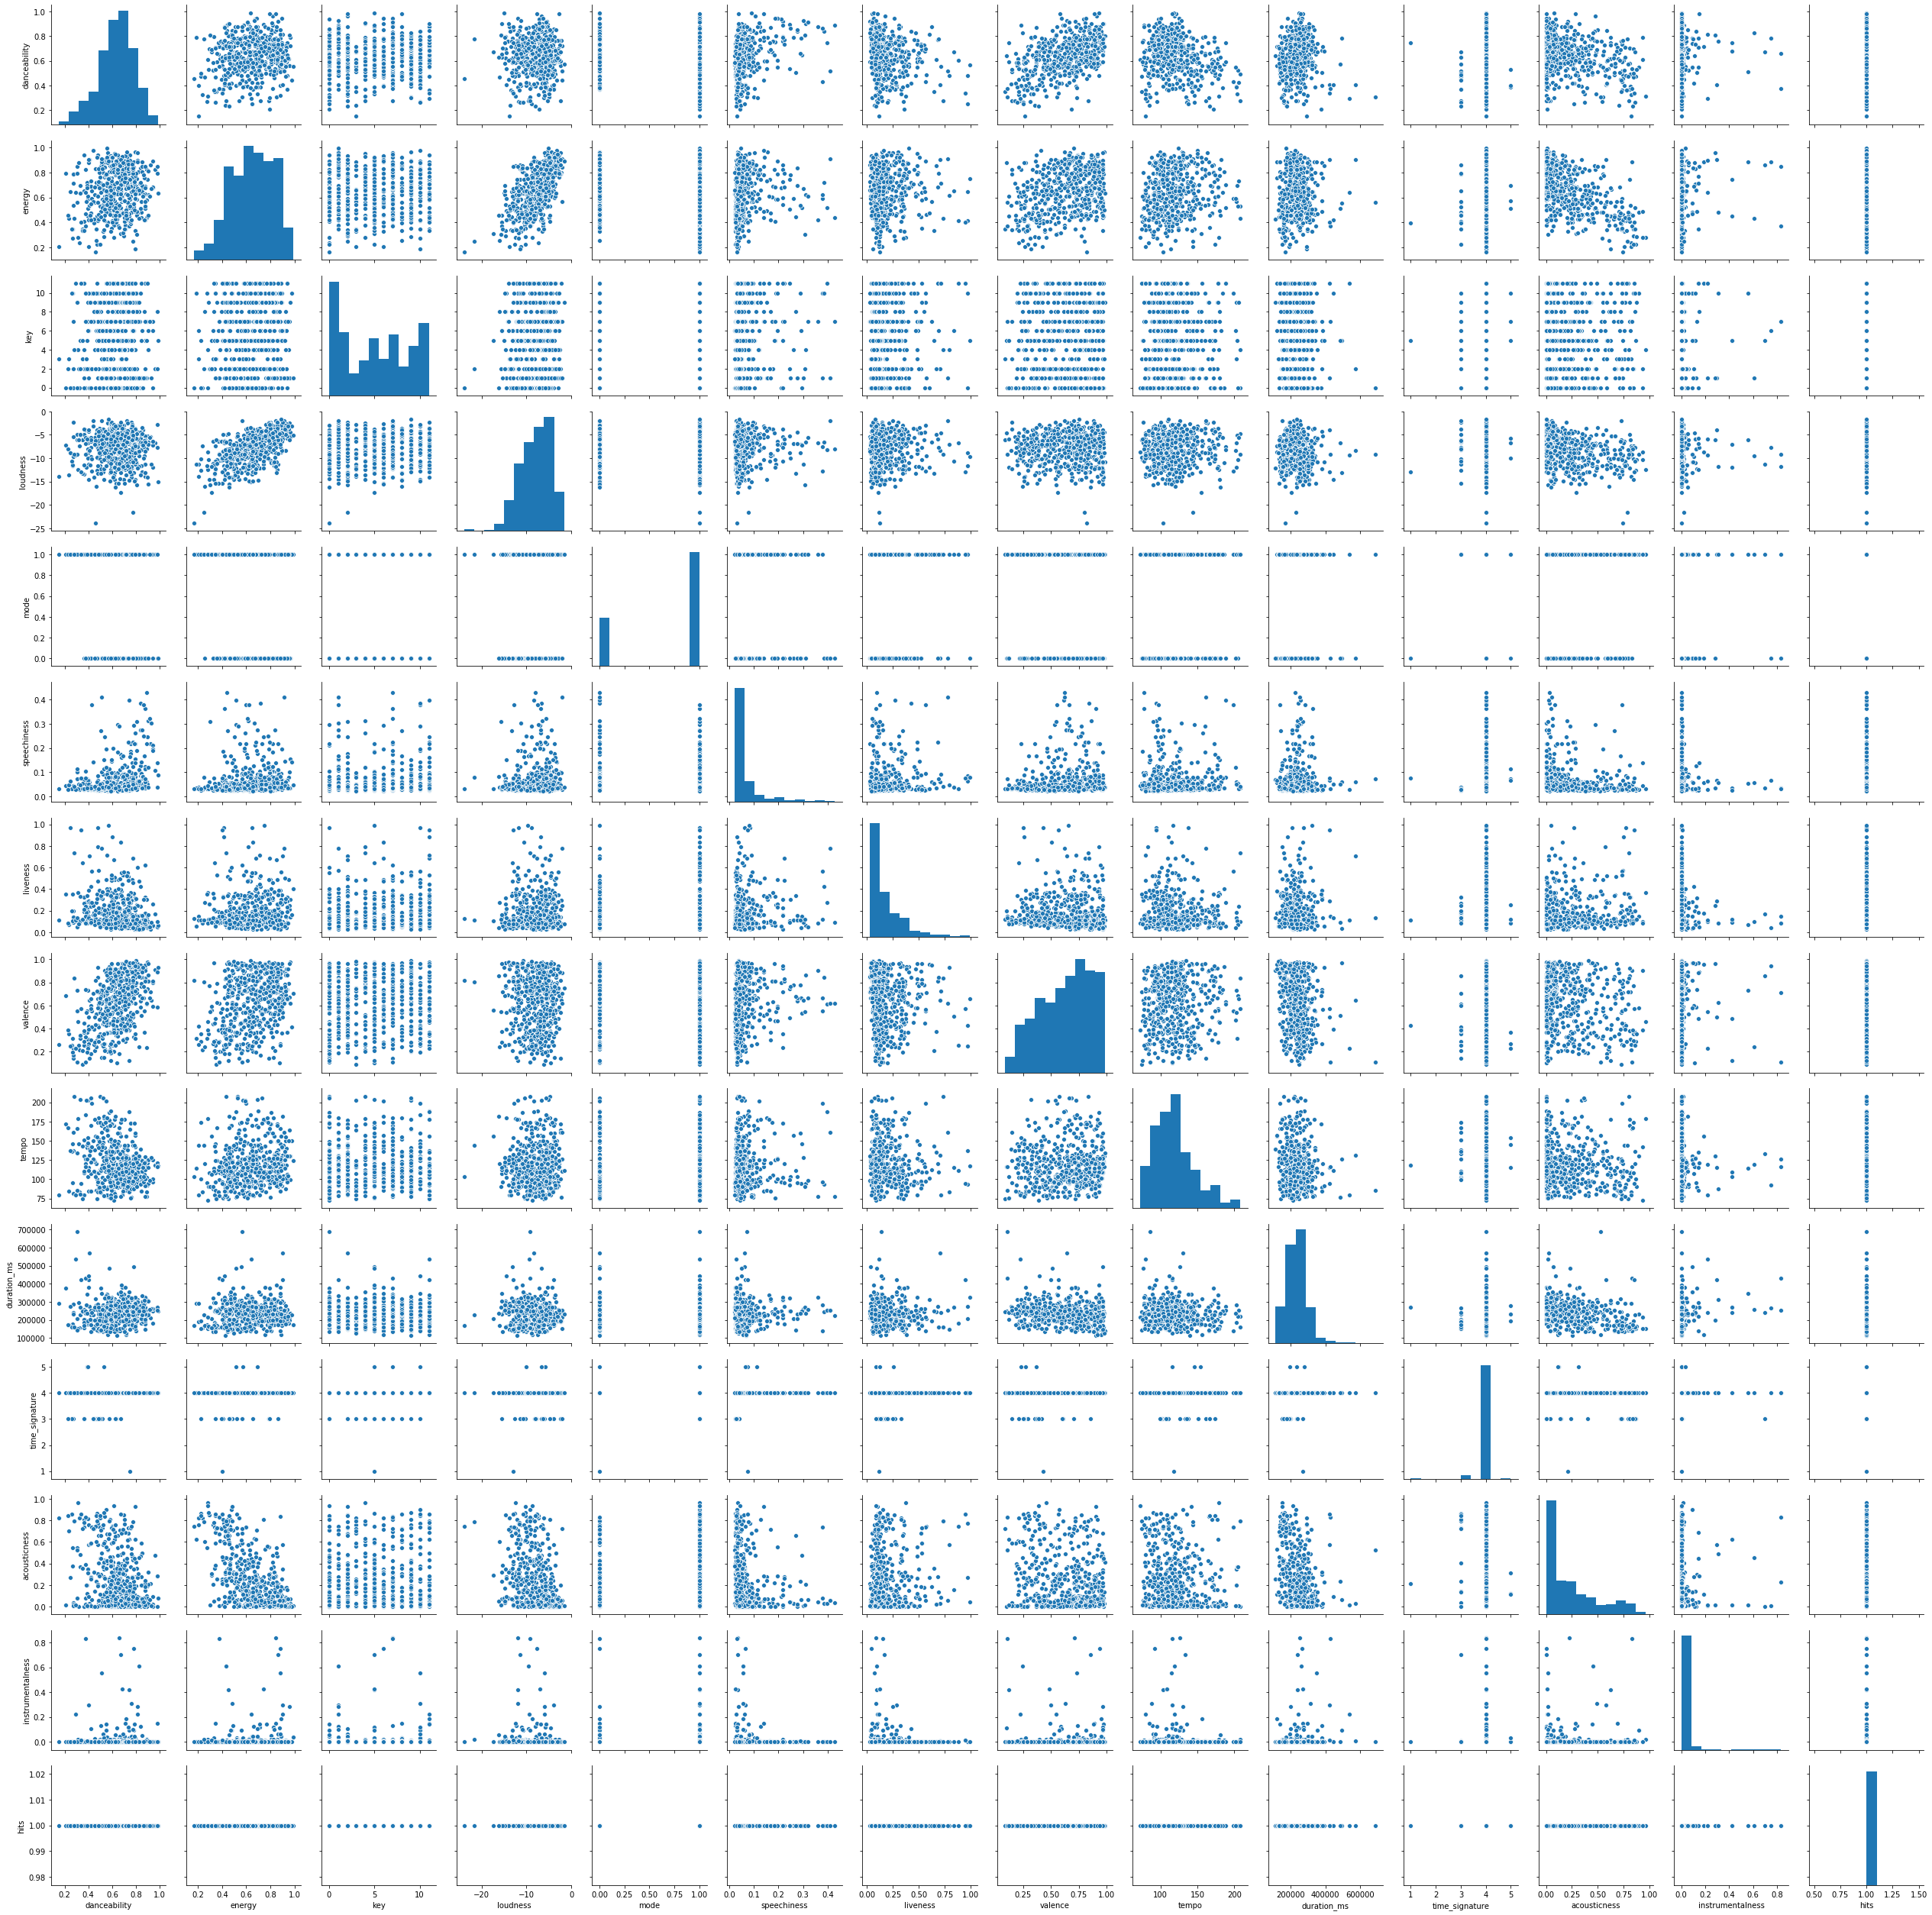

In [129]:
sns.pairplot(data=df_hits)
plt.show()

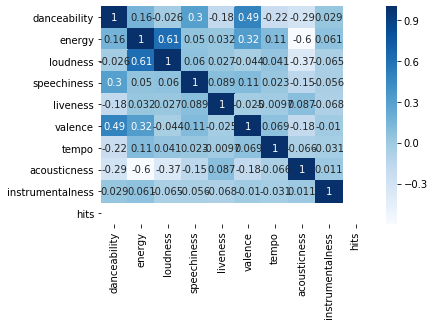

In [137]:
sns.heatmap(df_hits.corr(), annot=True, cmap='Blues')
plt.show()